# Assignment_4 DT

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

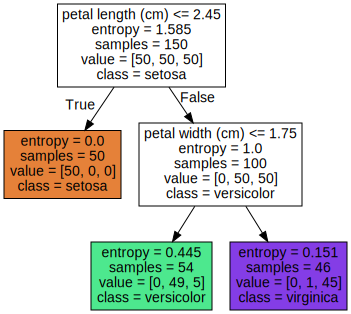

In [ ]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz


dot_data = sklearn.tree.export_graphviz(tree_clf , out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                filled=True)
graph = Source(dot_data, format="png")
graph





## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

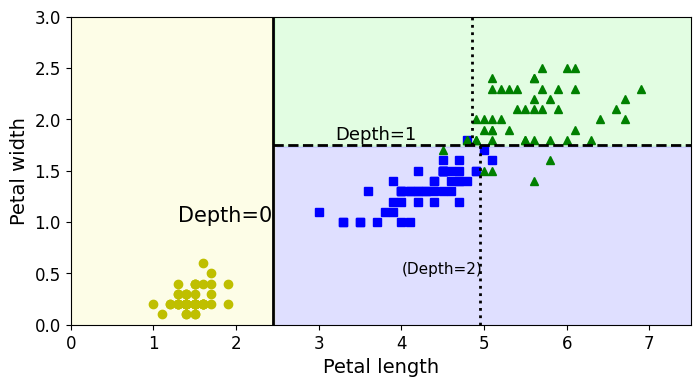

In [ ]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.30, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.0, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

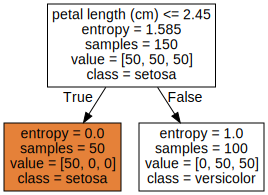

In [ ]:
####### YOUR CODE HERE
# Q2.1
tree_depth1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_depth1.fit(X, y)
dot_data = sklearn.tree.export_graphviz(tree_depth1 , out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                filled=True)
graph = Source(dot_data, format="png")
graph


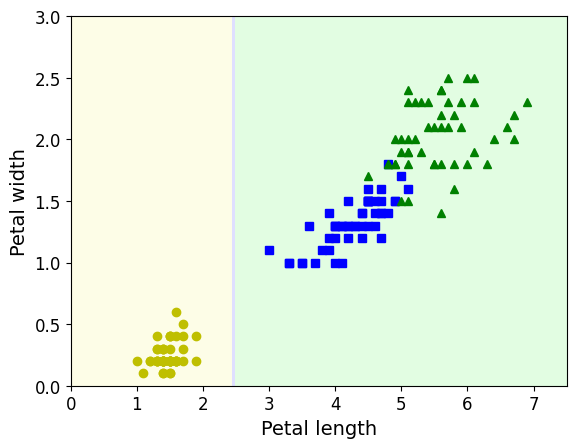

In [ ]:
plot_decision_boundary(tree_depth1, X, y)

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

####The output entropy indicates how random are the samples in each subset of the data, the results for a tree of depth 1 are as follows
1. @depth0 = 1.585 || @depth1 first node = 0 || @depth1 second node = 1.0

  // comments on the entropy

at low depth the entropy is high because we have not divided the data yet according to the features, after choosing the petal legnth as our feature(question) the entropy in one node is 0 which means it is a pure node and can be used for classification, at the other node the entropy is 1 which indicates a reduction from the parent node but it can not be used for classification as it still has high entropy so a tree of depth 1 under fits the data

2. the difference is in how many times we split the data according to the features, in our case we can split the tree more than one time on a single feature because we have numerical values so they can have many different splits, as we increase the depth we divide the data better but we can run into the problem of over fitting the data as we notice the number of samples in leafs decreases with each split.
tree of depth 2 seem to offer the best generalization between the trees as depth1 underfits and a max of 10(which ends at 5) over fits

**Answer**

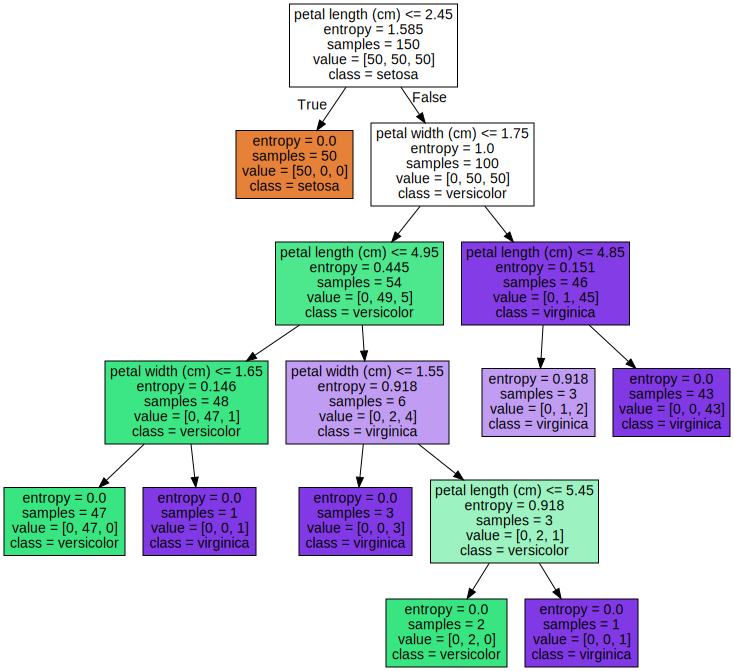

In [ ]:
tree_depth10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_depth10.fit(X, y)
dot_data = sklearn.tree.export_graphviz(tree_depth10 , out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                filled=True)
graph = Source(dot_data, format="png")
graph

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1.  at root we go to false branch because 5 > 2.45 --> then 1.5 < 1.75 so we go to True  the samples are 54 and the classes are divided as [ 0 , 49 ,5 ]
so the probabilities are 0, 49/54 =0. 907, 5/54 =0.09

we obtain the same results as the function.

In [ ]:
######### Your code for (2.2)
X=[[5,1.5]]
tree_clf.predict_proba(X)

array([[0.        , 0.90740741, 0.09259259]])

## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.96


<ipython-input-56-5805663df358>:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-56-5805663df358>:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-56-5805663df358>:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-56-5805663df358>:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-56-5805663df358>:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-56-5805663df358>:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


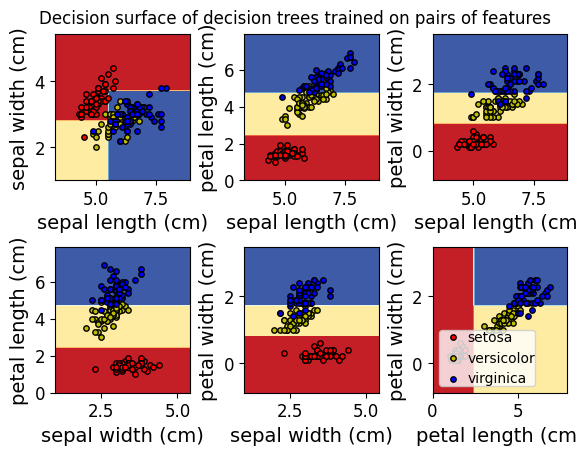

In [ ]:
##### YOUR CODE HERE
from sklearn.inspection import DecisionBoundaryDisplay
X = iris.data  # original data
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)
print(tree_clf.score(X,y)) # mean accuracy score on training data
##  the decision boundary only takes 2 features as axes each time so we will plot the permutation of the 4 features boundaries instead
# we will use the sk_learn decision boundary example : https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
    tree_clf.fit(X, y)
       # Plot the decision boundary

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        tree_clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower left", borderpad=0, handletextpad=0)
_ = plt.axis("tight")




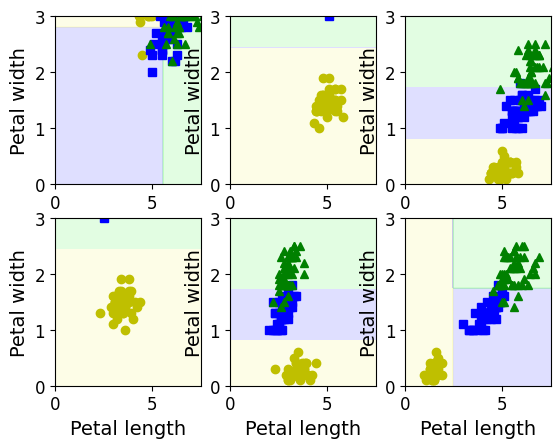

In [ ]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
    tree_clf.fit(X, y)
       # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plot_decision_boundary(tree_clf,X,y)

The following cell rotates the data by angle 20

In [ ]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)



**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.9733333333333334


<ipython-input-60-d9ab38e35911>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-60-d9ab38e35911>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-60-d9ab38e35911>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-60-d9ab38e35911>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-60-d9ab38e35911>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-60-d9ab38e35911>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


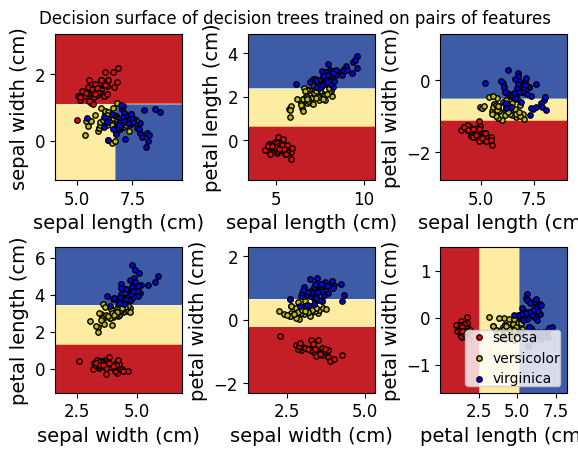

In [ ]:
##### YOUR CODE HERE
rotatedtree=DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
rotatedtree.fit(Xr,y)
print(rotatedtree.score(Xr,y))

# plot decision boundaries for rotated features

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    Xr= X.dot(rotation_matrix)
    y = iris.target

    # Train
    tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
    tree_clf.fit(Xr, y)
    # Plot the decision boundary

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        tree_clf,
        Xr,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            Xr[idx, 0],
            Xr[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")








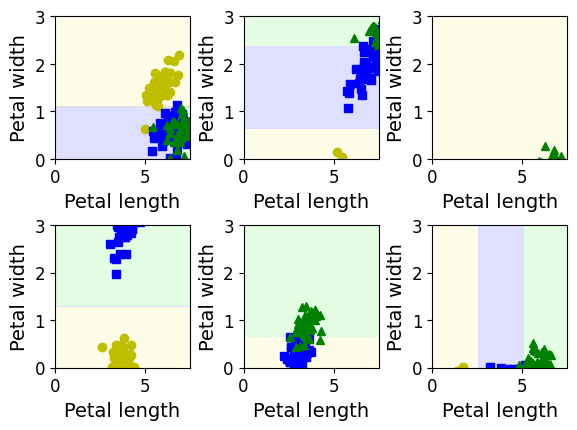

In [ ]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    Xr= X.dot(rotation_matrix)
    y = iris.target

    # Train
    tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
    tree_clf.fit(Xr, y)
    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    plot_decision_boundary(tree_clf,Xr,y)

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [ ]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

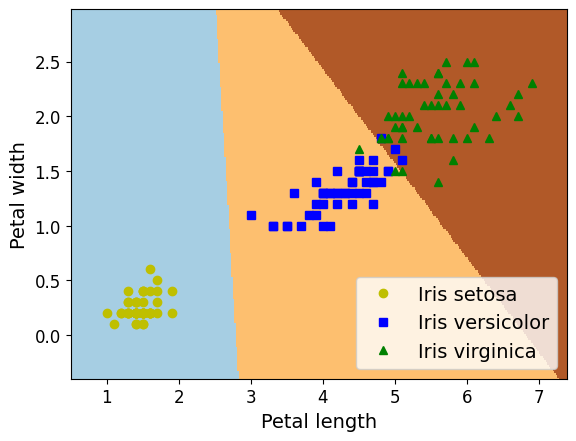

0.9666666666666667


In [ ]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
X = iris.data[:, 2:] # petal length and width
y = iris.target
clf = LogisticRegression(random_state=42).fit(X, y)
axes=plt.plot()
plot_logistic_regression(clf,X,y,axes)
print(clf.score(X,y))

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

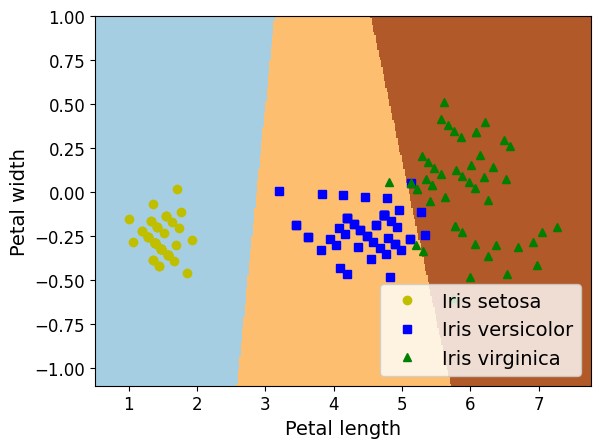

0.9666666666666667


In [ ]:
###### YOUR CODE HERE
Xr=X.dot(rotation_matrix)
rotatedmodel=LogisticRegression(random_state=42).fit(Xr, y)
axes=plt.plot()
plot_logistic_regression(rotatedmodel,Xr,y,axes)
print(rotatedmodel.score(Xr,y))


### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. the decision tree model was affected by rotating the data (actually scored better) while the logistic regression model was not affected and had the same exact score.

2. this happens because the decision boundaries for these models are different decision trees bisect the space into smaller subsections with each split while logistic regression uses linear lines to divide the space so for logistic regression the boundaries are just rotated with the same angle when the data is rotated but decision trees can not rotate sub sections of the space as the boundaries are decided with each split so they get affected by the rotation.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [ ]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=10000, noise=0.4)
X.shape # 2 features


(10000, 2)

2. Split it into a training set and a test set using train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)


3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier.
    - Choose reasonable values for each hyperparameter.

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
clf = DecisionTreeClassifier()
max_depth=[2,4,5,7]
max_leaf_nodes=[2,4,7,10]
min_samples_split=[2,3,4,5]
param_grid = {'max_depth': max_depth,
              'max_leaf_nodes':max_leaf_nodes,
              'min_samples_split': min_samples_split
              }
g_search = GridSearchCV(clf, param_grid = param_grid, cv = 4, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [ ]:
bestparam=DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, min_samples_split=2, random_state=42)
bestparam.fit(X_train,y_train)
print(bestparam.score(X_test, y_test))

0.8524242424242424


## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. the model at maxdepth 5 seems to follow the input data quite well but it seems to suffer from overfitting as it follows the data closely even in very sharp transitions that could be noise, the model at depth 2 does not seem to follow the data as well as the other but it follows the general direction of the data points well without being overfitted to the input so it might be a better generalization
2. the model at depth 5 will have a higher variance error because it is over fitted to the input data so it will not do well on new unseen test data
3. the model at depth 2 will have higher bias error because it is a more general model so it does not match the training data as closely as the other model does

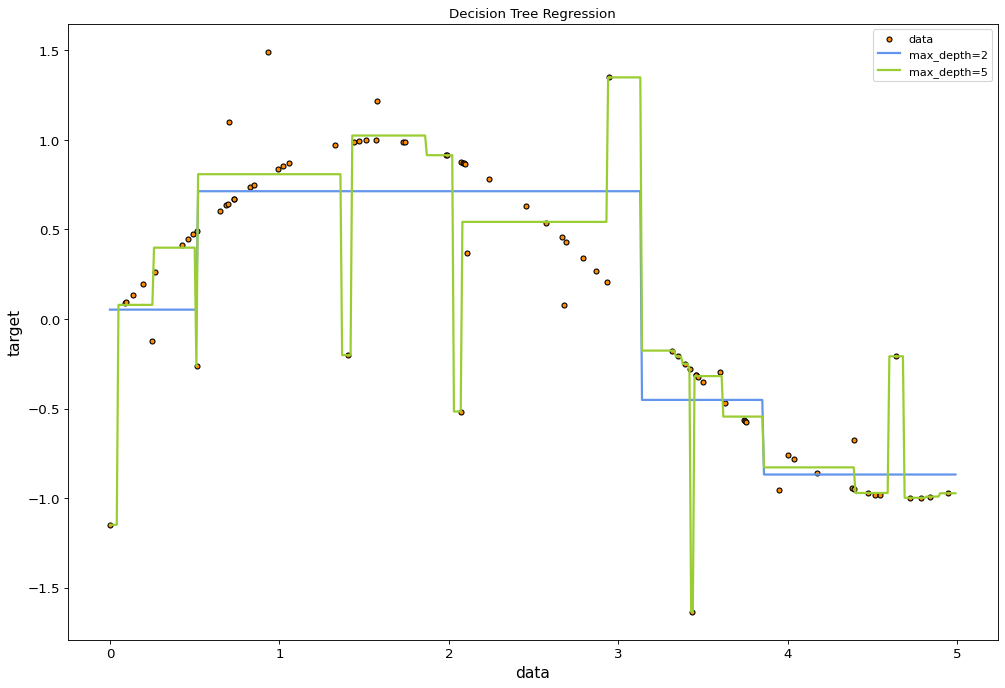

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")

plt.plot(X_test, y_1, color="cornflowerblue",
        label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

